In [1]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cifar = cifar10.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = cifar
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [6]:
keras_model_1 = keras.models.Sequential()
keras_model_1.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
for i in range(20):
    keras_model_1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
keras_model_1.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_normal"))

Let's search for the optimal learning rate.

In [23]:
learning_rates = np.logspace(-7, 4, 20)

weights_file_name = "model_1_initial_weights.h5"

keras_model_1.save_weights(weights_file_name)

histories = []

for lr in learning_rates:
    keras_model_1.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"]
    )
    
    keras_model_1.load_weights(weights_file_name)
    
    keras_model_1.build()
    
    history = keras_model_1.fit(X_train, y_train, epochs=2, 
                     validation_data=(X_val, y_val),
                     verbose=0)
    histories.append(history)

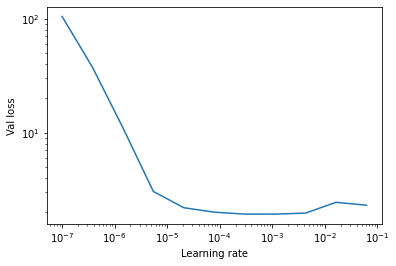

In [33]:
plt_x = []
plt_y = []

for (lr, history) in zip(learning_rates, histories):
    plt_x.append(lr)
    plt_y.append(history.history["val_loss"][-1])
    
plt.ioff()
plt.plot(plt_x, plt_y)
plt.xlabel("Learning rate")
plt.xscale("log")
plt.ylabel("Val loss")
plt.yscale("log")
plt.show()

The optimal learning rate seems to lie between $10^{-2}$ and $10^{-3}$. I will pick $10^{-3}$ as my learning rate.

In [43]:
keras_model_1.load_weights(weights_file_name)

keras_model_1.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
keras_model_1.build()

In [44]:
keras_model_1.fit(X_train, y_train, epochs=200, 
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
1172/1172 [==============================] - 12s 8ms/step - loss: 3.8923 - sparse_categorical_accuracy: 0.2049 - val_loss: 1.9603 - val_sparse_categorical_accuracy: 0.2785
Epoch 2/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.9665 - sparse_categorical_accuracy: 0.2741 - val_loss: 1.9440 - val_sparse_categorical_accuracy: 0.2914
Epoch 3/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.9058 - sparse_categorical_accuracy: 0.3028 - val_loss: 1.8804 - val_sparse_categorical_accuracy: 0.3098
Epoch 4/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.8620 - sparse_categorical_accuracy: 0.3225 - val_loss: 1.8278 - val_sparse_categorical_accuracy: 0.3319
Epoch 5/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.8363 - sparse_categorical_accuracy: 0.3325 - val_loss: 1.8078 - val_sparse_categorical_accuracy: 0.3410
Epoch 6/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.

1172/1172 [==============================] - 9s 8ms/step - loss: 1.7000 - sparse_categorical_accuracy: 0.3667 - val_loss: 1.7387 - val_sparse_categorical_accuracy: 0.3514
Epoch 90/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.7215 - sparse_categorical_accuracy: 0.3636 - val_loss: 1.7328 - val_sparse_categorical_accuracy: 0.3581
Epoch 91/200
1172/1172 [==============================] - 9s 8ms/step - loss: 1.6772 - sparse_categorical_accuracy: 0.3771 - val_loss: 1.7359 - val_sparse_categorical_accuracy: 0.3553
Epoch 92/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.6612 - sparse_categorical_accuracy: 0.3852 - val_loss: 1.7360 - val_sparse_categorical_accuracy: 0.3627
Epoch 93/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.6428 - sparse_categorical_accuracy: 0.3915 - val_loss: 1.7175 - val_sparse_categorical_accuracy: 0.3712
Epoch 94/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.6319 - sp

In [47]:
keras_model_1.save("best_model_1.h5")
keras_model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6127 - sparse_categorical_accuracy: 0.4269


[1.6126757860183716, 0.4268999993801117]

42.6% accuracy is not good at all. Let's try the BatchNormalization approach.

In [46]:
keras_model_2 = keras.models.Sequential()
keras_model_2.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
for i in range(20):
    keras_model_2.add(keras.layers.BatchNormalizationtchNormalizationtchNormalizationtchNormalizationtchNormalizationtchNormalizationtchNormalizationrmalizationNormalizationNormalizationchNormalization())
    keras_model_2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
keras_model_2.add(keras.layers.BatchNormalization())
keras_model_2.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_normal"))

In [48]:
learning_rates = np.logspace(-7, 4, 20)

weights_file_name = "model_2_initial_weights.h5"

keras_model_2.save_weights(weights_file_name)

histories = []

for lr in learning_rates:
    keras_model_2.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"]
    )
    
    keras_model_2.load_weights(weights_file_name)
    
    keras_model_2.build()
    
    history = keras_model_2.fit(X_train, y_train, epochs=2, 
                     validation_data=(X_val, y_val),
                     verbose=0)
    histories.append(history)

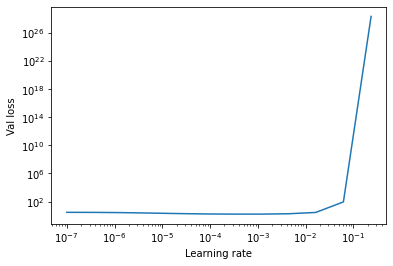

In [49]:
plt_x = []
plt_y = []

for (lr, history) in zip(learning_rates, histories):
    plt_x.append(lr)
    plt_y.append(history.history["val_loss"][-1])
    
plt.ioff()
plt.plot(plt_x, plt_y)
plt.xlabel("Learning rate")
plt.xscale("log")
plt.ylabel("Val loss")
plt.yscale("log")
plt.show()

Again, learning arte of $10^{(-3-2)\over2}$ = $10^{-2}*10^{-0.5}$ seems like a reasonable choice.

In [51]:
keras_model_2.load_weights(weights_file_name)

keras_model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=10**(-0.5)*1e-2),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
keras_model_2.build()

In [52]:
keras_model_2.fit(X_train, y_train, epochs=200, 
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
1172/1172 [==============================] - 24s 14ms/step - loss: 1.9464 - sparse_categorical_accuracy: 0.3005 - val_loss: 1.7974 - val_sparse_categorical_accuracy: 0.3710
Epoch 2/200
1172/1172 [==============================] - 17s 14ms/step - loss: 1.7712 - sparse_categorical_accuracy: 0.3669 - val_loss: 1.7300 - val_sparse_categorical_accuracy: 0.3911
Epoch 3/200
1172/1172 [==============================] - 16s 14ms/step - loss: 1.6946 - sparse_categorical_accuracy: 0.3971 - val_loss: 1.7522 - val_sparse_categorical_accuracy: 0.4104
Epoch 4/200
1172/1172 [==============================] - 17s 14ms/step - loss: 1.6468 - sparse_categorical_accuracy: 0.4161 - val_loss: 1.6361 - val_sparse_categorical_accuracy: 0.4246
Epoch 5/200
1172/1172 [==============================] - 16s 14ms/step - loss: 1.6021 - sparse_categorical_accuracy: 0.4359 - val_loss: 1.6120 - val_sparse_categorical_accuracy: 0.4282
Epoch 6/200
1172/1172 [==============================] - 16s 14ms/step - lo

This time, even though the training step itself takes longer, the accuracy grows much faster taking the wall time into account. Also, the resulting accuracy is considerably better.

In [54]:
keras_model_2.evaluate(X_test, y_test)
keras_model_2.save("best_model_2.h5")

313/313 [==============================] - 1s 4ms/step - loss: 1.4241 - sparse_categorical_accuracy: 0.5141


In [74]:
keras_model_3 = keras.models.Sequential()
keras_model_3.add(keras.layers.InputLayer(input_shape=X_train_norm.shape[1:]))
for i in range(20):
    keras_model_3.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
keras_model_3.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_normal"))


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, np.prod(X_train.shape[1:])))
X_train_norm = scaler.transform(X_train.reshape(-1, np.prod(X_train.shape[1:])))
X_val_norm = scaler.transform(X_val.reshape(-1, np.prod(X_train.shape[1:])))
X_test_norm = scaler.transform(X_test.reshape(-1, np.prod(X_train.shape[1:])))

In [76]:
learning_rates = np.logspace(-7, 4, 20)

weights_file_name = "model_3_initial_weights.h5"

keras_model_3.save_weights(weights_file_name)

histories = []

for lr in learning_rates:
    keras_model_3.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"]
    )
    
    keras_model_3.load_weights(weights_file_name)
    
    keras_model_3.build()
    
    history = keras_model_3.fit(X_train_norm, y_train, epochs=2, 
                     validation_data=(X_val_norm, y_val),
                     verbose=0)
    histories.append(history)

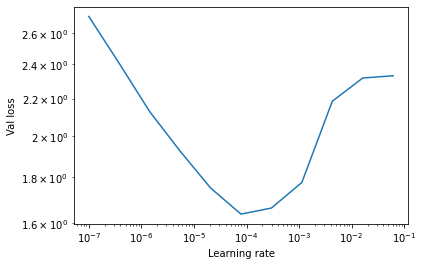

In [77]:
plt_x = []
plt_y = []

for (lr, history) in zip(learning_rates, histories):
    plt_x.append(lr)
    plt_y.append(history.history["val_loss"][-1])
    
plt.ioff()
plt.plot(plt_x, plt_y)
plt.xlabel("Learning rate")
plt.xscale("log")
plt.ylabel("Val loss")
plt.yscale("log")
plt.show()

This time picking the right learning rate seems obvious.

In [79]:
keras_model_3.load_weights(weights_file_name)

keras_model_3.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.7*1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
keras_model_3.build()

In [80]:
keras_model_3.fit(X_train_norm, y_train, epochs=200, 
                    validation_data=(X_val_norm, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
1172/1172 [==============================] - 12s 8ms/step - loss: 1.8828 - sparse_categorical_accuracy: 0.3289 - val_loss: 1.7436 - val_sparse_categorical_accuracy: 0.3789
Epoch 2/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.6604 - sparse_categorical_accuracy: 0.4090 - val_loss: 1.6665 - val_sparse_categorical_accuracy: 0.4049
Epoch 3/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.5480 - sparse_categorical_accuracy: 0.4507 - val_loss: 1.5943 - val_sparse_categorical_accuracy: 0.4330
Epoch 4/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.4689 - sparse_categorical_accuracy: 0.4787 - val_loss: 1.5603 - val_sparse_categorical_accuracy: 0.4509
Epoch 5/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.4050 - sparse_categorical_accuracy: 0.5016 - val_loss: 1.5312 - val_sparse_categorical_accuracy: 0.4607
Epoch 6/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.

In [81]:
keras_model_3.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4982 - sparse_categorical_accuracy: 0.4761


[1.4982140064239502, 0.47609999775886536]

The model reaches a good training accuracy, but seems to overfit the training data a lot. That's why alpha dropout is a good idea.

In [8]:
keras_model_4 = keras.models.Sequential()
keras_model_4.add(keras.layers.InputLayer(input_shape=X_train_norm.shape[1:]))
for i in range(20):
    keras_model_4.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    if i > 15:
        keras_model_4.add(keras.layers.AlphaDropout(rate=0.2))
keras_model_4.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_normal"))

In [9]:
learning_rates = np.logspace(-7, 4, 20)

weights_file_name = "model_3_initial_weights.h5"

keras_model_4.save_weights(weights_file_name)

histories = []

for lr in learning_rates:
    keras_model_4.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"]
    )
    
    keras_model_4.load_weights(weights_file_name)
    
    keras_model_4.build()
    
    history = keras_model_4.fit(X_train_norm, y_train, epochs=2, 
                     validation_data=(X_val_norm, y_val),
                     verbose=0)
    histories.append(history)

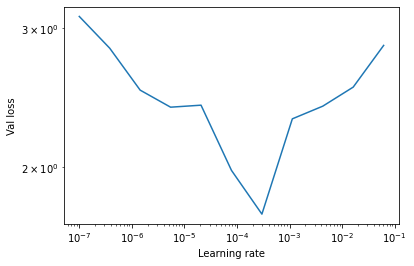

In [10]:
plt_x = []
plt_y = []

for (lr, history) in zip(learning_rates, histories):
    plt_x.append(lr)
    plt_y.append(history.history["val_loss"][-1])
    
plt.ioff()
plt.plot(plt_x, plt_y)
plt.xlabel("Learning rate")
plt.xscale("log")
plt.ylabel("Val loss")
plt.yscale("log")
plt.show()

In [11]:
keras_model_4.load_weights(weights_file_name)

keras_model_4.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=10**(-0.5)*1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
keras_model_4.build()

In [12]:
keras_model_4.fit(X_train_norm, y_train, epochs=200, 
                    validation_data=(X_val_norm, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
1172/1172 [==============================] - 13s 9ms/step - loss: 2.1404 - sparse_categorical_accuracy: 0.2452 - val_loss: 1.9415 - val_sparse_categorical_accuracy: 0.3534
Epoch 2/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.7995 - sparse_categorical_accuracy: 0.3494 - val_loss: 1.8040 - val_sparse_categorical_accuracy: 0.3937
Epoch 3/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.6834 - sparse_categorical_accuracy: 0.4013 - val_loss: 1.8560 - val_sparse_categorical_accuracy: 0.4295
Epoch 4/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.5950 - sparse_categorical_accuracy: 0.4347 - val_loss: 1.8317 - val_sparse_categorical_accuracy: 0.4249
Epoch 5/200
1172/1172 [==============================] - 10s 8ms/step - loss: 1.5321 - sparse_categorical_accuracy: 0.4661 - val_loss: 1.8758 - val_sparse_categorical_accuracy: 0.4482
Epoch 6/200
1172/1172 [==============================] - 11s 9ms/step - loss: 1.

In [13]:
keras_model_4.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7855 - sparse_categorical_accuracy: 0.4032


[1.785502552986145, 0.4032000005245209]

In [15]:
y_probas = np.stack([keras_model_4(X_test_norm, training=True) for sample in range(100)])

In [17]:
y_proba = np.mean(y_probas, axis=0)

In [20]:
y_pred_mc = np.argmax(y_proba, axis=1)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_pred_mc, y_test)

0.4215

Not much improvement with dropout, but the model still overfits. Let's recreate the model with higher dropout rate.

In [23]:
keras_model_5 = keras.models.Sequential()
keras_model_5.add(keras.layers.InputLayer(input_shape=X_train_norm.shape[1:]))
for i in range(20):
    keras_model_5.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    if i > 11:
        keras_model_5.add(keras.layers.AlphaDropout(rate=0.4))
keras_model_5.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_normal"))

In [24]:
learning_rates = np.logspace(-7, 4, 20)

weights_file_name = "model_3_initial_weights.h5"

keras_model_5.save_weights(weights_file_name)

histories = []

for lr in learning_rates:
    keras_model_5.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"]
    )
    
    keras_model_5.load_weights(weights_file_name)
    
    keras_model_5.build()
    
    history = keras_model_5.fit(X_train_norm, y_train, epochs=2, 
                     validation_data=(X_val_norm, y_val),
                     verbose=0)
    histories.append(history)

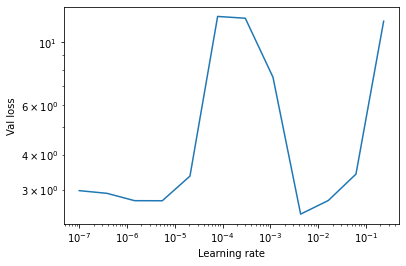

In [25]:
plt_x = []
plt_y = []

for (lr, history) in zip(learning_rates, histories):
    plt_x.append(lr)
    plt_y.append(history.history["val_loss"][-1])
    
plt.ioff()
plt.plot(plt_x, plt_y)
plt.xlabel("Learning rate")
plt.xscale("log")
plt.ylabel("Val loss")
plt.yscale("log")
plt.show()

In [45]:
class onecycle(keras.callbacks.Callback):
    def __init__(self, n1 = 1.0, n0 = None,
                epochs = 100):
        self.half_epochs = epochs//2
        self.n1 = n1
        self.current_batch = 0
        if n0 == None:
            self.n0 = self.n1/10
        else:
            self.n0 = self.n1
            
    def on_batch_begin(self, batch, logs):
        if self.current_batch < self.half_epochs:
            lr = (self.half_epochs-self.current_batch)/self.half_epochs*self.n0 \
                + (self.current_batch)/self.half_epochs*self.n1
        elif self.current_batch <= self.half_epochs*2:
            lr = (2*self.half_epochs-self.current_batch)/self.half_epochs*self.n1 \
                + (self.current_batch-self.half_epochs)/self.half_epochs*self.n0
        else:
            lr = self.n0/(self.current_batch-self.half_epochs*2)/self.half_epochs
        self.current_batch += 1
        keras.backend.set_value(self.model.optimizer.learning_rate, lr)

In [50]:
batch_size = 128
n1 = 0.005
max_iter = np.ceil(len(X_train) / batch_size) * 1200

In [51]:
cycle_scheduler = onecycle(n1, epochs=max_iter)

In [52]:
keras_model_5.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=lr),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

keras_model_5.load_weights(weights_file_name)

In [ ]:
history = keras_model_5.fit(X_train_norm, y_train, epochs=1200, batch_size=batch_size,
                    validation_data=(X_val_norm, y_val),
                    callbacks=[cycle_scheduler, keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)])

Epoch 1/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.9767 - sparse_categorical_accuracy: 0.2086 - val_loss: 33.3721 - val_sparse_categorical_accuracy: 0.1802
Epoch 2/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.9147 - sparse_categorical_accuracy: 0.2408 - val_loss: 31.9955 - val_sparse_categorical_accuracy: 0.1862
Epoch 3/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.8720 - sparse_categorical_accuracy: 0.2593 - val_loss: 29.2634 - val_sparse_categorical_accuracy: 0.1866
Epoch 4/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.8345 - sparse_categorical_accuracy: 0.2780 - val_loss: 30.6563 - val_sparse_categorical_accuracy: 0.1855
Epoch 5/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.8033 - sparse_categorical_accuracy: 0.2930 - val_loss: 26.9573 - val_sparse_categorical_accuracy: 0.1856
Epoch 6/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.7

293/293 [==============================] - 5s 17ms/step - loss: 2.0490 - sparse_categorical_accuracy: 0.2295 - val_loss: 9.1611 - val_sparse_categorical_accuracy: 0.1914
Epoch 90/1200
293/293 [==============================] - 5s 17ms/step - loss: 2.0188 - sparse_categorical_accuracy: 0.2325 - val_loss: 10.4934 - val_sparse_categorical_accuracy: 0.1666
Epoch 91/1200
293/293 [==============================] - 5s 17ms/step - loss: 1.9897 - sparse_categorical_accuracy: 0.2450 - val_loss: 8.5726 - val_sparse_categorical_accuracy: 0.1591
Epoch 92/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.0364 - sparse_categorical_accuracy: 0.2101 - val_loss: 2.8679 - val_sparse_categorical_accuracy: 0.1364
Epoch 93/1200
293/293 [==============================] - 5s 17ms/step - loss: 2.0682 - sparse_categorical_accuracy: 0.1920 - val_loss: 9.5766 - val_sparse_categorical_accuracy: 0.1893
Epoch 94/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.0543 - sparse

293/293 [==============================] - 5s 17ms/step - loss: 2.0084 - sparse_categorical_accuracy: 0.1979 - val_loss: 14.9169 - val_sparse_categorical_accuracy: 0.1330
Epoch 178/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.9929 - sparse_categorical_accuracy: 0.2053 - val_loss: 6.4309 - val_sparse_categorical_accuracy: 0.1692
Epoch 179/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.9484 - sparse_categorical_accuracy: 0.2243 - val_loss: 6.3177 - val_sparse_categorical_accuracy: 0.2007
Epoch 180/1200
293/293 [==============================] - 5s 18ms/step - loss: 1.9918 - sparse_categorical_accuracy: 0.2012 - val_loss: 8.2898 - val_sparse_categorical_accuracy: 0.1677
Epoch 181/1200
293/293 [==============================] - 5s 17ms/step - loss: 2.0347 - sparse_categorical_accuracy: 0.1846 - val_loss: 10.2212 - val_sparse_categorical_accuracy: 0.1753
Epoch 182/1200
293/293 [==============================] - 5s 17ms/step - loss: 1.9955 - 

293/293 [==============================] - 5s 18ms/step - loss: 2.3104 - sparse_categorical_accuracy: 0.1012 - val_loss: 2.3693 - val_sparse_categorical_accuracy: 0.1010
Epoch 266/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.3146 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3217 - val_sparse_categorical_accuracy: 0.1078
Epoch 267/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.3114 - sparse_categorical_accuracy: 0.0991 - val_loss: 2.3170 - val_sparse_categorical_accuracy: 0.0982
Epoch 268/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.3110 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3377 - val_sparse_categorical_accuracy: 0.0967
Epoch 269/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.3116 - sparse_categorical_accuracy: 0.1008 - val_loss: 2.3428 - val_sparse_categorical_accuracy: 0.0953
Epoch 270/1200
293/293 [==============================] - 5s 18ms/step - loss: 2.3120 - sp

In [14]:
main_model_input = keras.layers.Input(shape=X_train.shape[1:])
main_model_flatten = keras.layers.Flatten(input_shape=X_train.shape[1:])(main_model_input)
main_model_batch0 = keras.layers.BatchNormalization()(main_model_flatten)
main_model_wide = keras.layers.Dense(400, activation="elu", kernel_initializer="he_normal")(main_model_batch0)
main_model_batch1 = keras.layers.BatchNormalization()(main_model_wide)
#adding deep path
last_deep = main_model_batch1
for i in range(5):
    last_deep = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal")(last_deep)
    last_deep = keras.layers.BatchNormalization()(last_deep)
#concatenate
main_model_concat = keras.layers.Concatenate()([last_deep, main_model_wide])
main_model_output = keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_normal")(main_model_concat)

In [18]:
main_model = keras.models.Model(inputs=[main_model_input], outputs=[main_model_output])

In [21]:
main_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["sparse_categorical_accuracy"],
    optimizer = keras.optimizers.Nadam(learning_rate=0.5e-3)
)

In [22]:
main_model.fit(X_train, y_train, epochs = 1000,
              validation_data=(X_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)])

Epoch 1/1000
1172/1172 [==============================] - 19s 15ms/step - loss: 1.8017 - sparse_categorical_accuracy: 0.3393 - val_loss: 1.6807 - val_sparse_categorical_accuracy: 0.3990
Epoch 2/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 1.5891 - sparse_categorical_accuracy: 0.4286 - val_loss: 1.5612 - val_sparse_categorical_accuracy: 0.4469
Epoch 3/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 1.4877 - sparse_categorical_accuracy: 0.4688 - val_loss: 1.5043 - val_sparse_categorical_accuracy: 0.4660
Epoch 4/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 1.4252 - sparse_categorical_accuracy: 0.4894 - val_loss: 1.4834 - val_sparse_categorical_accuracy: 0.4841
Epoch 5/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 1.3759 - sparse_categorical_accuracy: 0.5074 - val_loss: 1.4503 - val_sparse_categorical_accuracy: 0.4966
Epoch 6/1000
1172/1172 [==============================] - 17s 14ms/ste

Epoch 45/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 0.5819 - sparse_categorical_accuracy: 0.7922 - val_loss: 2.1009 - val_sparse_categorical_accuracy: 0.5112
Epoch 46/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 0.5717 - sparse_categorical_accuracy: 0.7950 - val_loss: 2.1414 - val_sparse_categorical_accuracy: 0.5098
Epoch 47/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 0.5641 - sparse_categorical_accuracy: 0.7989 - val_loss: 2.1686 - val_sparse_categorical_accuracy: 0.4970
Epoch 48/1000
1172/1172 [==============================] - 17s 14ms/step - loss: 0.5496 - sparse_categorical_accuracy: 0.8046 - val_loss: 2.1526 - val_sparse_categorical_accuracy: 0.5110
Epoch 49/1000
1172/1172 [==============================] - 18s 15ms/step - loss: 0.5364 - sparse_categorical_accuracy: 0.8094 - val_loss: 2.1797 - val_sparse_categorical_accuracy: 0.5057
Epoch 50/1000
1172/1172 [==============================] - 18s 16

Epoch 89/1000
1172/1172 [==============================] - 19s 16ms/step - loss: 0.3211 - sparse_categorical_accuracy: 0.8856 - val_loss: 3.0739 - val_sparse_categorical_accuracy: 0.5080
Epoch 90/1000
1172/1172 [==============================] - 19s 16ms/step - loss: 0.3113 - sparse_categorical_accuracy: 0.8911 - val_loss: 3.0829 - val_sparse_categorical_accuracy: 0.5022
Epoch 91/1000
1172/1172 [==============================] - 19s 16ms/step - loss: 0.3059 - sparse_categorical_accuracy: 0.8921 - val_loss: 3.1257 - val_sparse_categorical_accuracy: 0.4978
Epoch 92/1000
1172/1172 [==============================] - 19s 16ms/step - loss: 0.3094 - sparse_categorical_accuracy: 0.8923 - val_loss: 3.1288 - val_sparse_categorical_accuracy: 0.4961
Epoch 93/1000
1172/1172 [==============================] - 19s 16ms/step - loss: 0.3052 - sparse_categorical_accuracy: 0.8927 - val_loss: 3.1301 - val_sparse_categorical_accuracy: 0.5015
Epoch 94/1000
1172/1172 [==============================] - 19s 16

In [23]:
main_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4039 - sparse_categorical_accuracy: 0.5117


[1.4038879871368408, 0.5116999745368958]